

## Eagar-Tsai solution

The purpose of the Eagar-Tsai (ET) model is to provide information about the weld pool shape and size for a travelling Gaussian distributed heat source on a semi-infinite plate. This heat transfer model offers a physically accurate, quantitative relationship between the process, material parameters and the resulting temperature field, thus the weld size and shape. The temperature field prediction allows for a better understanding of the process physical mechanisms and  can be utilized for process control, optimization, design of experiments, microstructure and residual stresses prediction.

In their paper, Eagar and Tsai compare predicted weld pool shapes with experimental weld pool shape measurements for laser welding. 


With Rosenthal's solution as a basis but using a travelling distributed heat source, Eagar and Tsai derived a solution that can predict the weld pool shape and size. Assumming a Gaussian distributed heat source function of the form 

\begin{align*}
\large
Q (x,y) = \frac{q}{2\pi\sigma^{2}}\exp{ \bigg(-\frac{x^2 + y^2}{2\sigma^2}\bigg)}
\end{align*}

where, $\sigma$ is the half-width of the arc.

Eventually, the solution for a Gaussian distributed heat source moving on a semi-infinite plate with no change in phase :

\begin{align*}
\large
T - T_{o} =  \int_0^t dt'' \frac{q}{\pi \rho c (4 \pi a )^{1/2}}\frac{t'' ^{-1/2}}{2at'' + \sigma^{2}} exp{ \bigg({- \frac{ w^{2} + y^{2} + 2 wvt'' + v^2 t''^{2} } {4at'' + 2\sigma^{2}} - \frac{z^{2}}{4at''}}\bigg)}
\end{align*}

$y$: Distance in the width dimension   
$z$: Distance in the depth dimension

### In dimensionless form:  

\begin{align*}
\large
\theta = \frac{n}{ \sqrt {2 \pi}} \int_0^\frac{v^{2} t }{2 a} d \tau \frac{\tau ^{-1/2}}{\tau + u^{2}} \exp { \bigg({- \frac{ \xi^{2} + \psi^{2} + 2 \xi \tau + \tau^{2} } {2\tau + 2u^{2}} - \frac{\zeta^{2}}{2\tau}}\bigg)} 
\end{align*}

\begin{align*}
\large
\xi = \frac{vw}{2a}, \
\psi = \frac{vy}{2a}, \
\zeta = \frac{vz}{2a}, \
\tau = \frac{v^2t''}{2a},\ 
\end{align*}

\begin{align*}
\large
\theta = \frac{T-T_{o}}{T_{c}-T_{o}}, \
u = \frac{ v \sigma  }{2a}, \
n = \frac{qv}{4 \pi a^2 \rho c (T_{c}-T_{o})} \\ 
\end{align*}

$T_{c}$ : Critical temperature ( e.g. material melting temperature)

The distribution (u) and operating parameter (n) are the two primary parameters of the solution. For $ u \rightarrow 0$ (zero beam width) the solution reduces to Rosenthal's.

### Comments on the replication of the results from other works
#### Tapia's thesis results
For the case of Tapia's thesis and the replication of his results:  
At higher speeds (higher than 2.5 m/s), the weld length, width, depth are all decreased. The max T is decreased and the maximum temperature locus is not at w = 0 but is shifted on the opposite to the traveling beam’s direction.  At lower speeds, the maximum temperature is higher than at 2.5 m/s and the maximum temperature occurs at w = 0. As the speed is increased, this point of maximum temperature starts to move left of the w=0 line. 

For my efforts to replicate the results of Tapia (with A = 0.4 instead of 0.3, as reported), the weld dimensions are replicated, so does the weld shape. The only difference is the location along the moving coordinate direction of the maximum temperature point on the graph.  
Tapia results   
Weld length : 317 um
Weld width : 150 um 
Weld depth : 23 um

My results: 
Weld length : 315 um 
Weld width : 150 um
Weld depth : 23 um

#### Publication from LLNL staff - Data Mining and Statistical Inference in Selective Laser Melting - Chandrika Kamath

Kamath, Chandrika. "Data mining and statistical inference in selective laser melting." The International Journal of Advanced Manufacturing Technology 86.5-8 (2016): 1659-1677.

In this paper, the ET model is used a fast and inexpensive way to explore the design space for the SLM of stainless steel 316L. The author provides a table (page 7) with their results of weld depth for certain reported processing parameters. They did not report the material thermophysical properties used, except for the absorptivity.  My goal was to replicate those results with the ET model script. Comparing the melt depth results from my calculations, the highest deviation was 5 micrometers, which provides confidence for this script's accuracy.

In [1]:
import numpy
from matplotlib import pyplot, cm
%matplotlib inline
from scipy.integrate import quad,quadrature,fixed_quad

def integrand(tau,xi,psi,zi,u):
    '''
    Function that returns the integrand of dimensionless temperature distribution to be numerically integrated
    > tau: Integration variable
    > xi, psi, zi: Dimensionless height, width, depth as in Eagar-Tsai paper
    > u: Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
    '''
    return ((tau**(-0.5))/(tau+(u**2)))*numpy.exp(-((((xi+tau)**2)+(psi**2))/((2*tau)+(2*(u**2))))-((zi**2)/(2*tau)))

def thetan_width(xi,psi,zi,u,taulim):
    ''' 
    Function that returns the dimensionless temperature - operating parameter ratio along the geometry's 
    dimensionless width by performing quadrature on the E-T model's integral.
    Also, it returns the absolute error of the quadrature.
    
    Inputs
        > xi : Dimensionless length 
        > psi : Dimensionless width (array)
        > zi : Dimensionless depth  
        > u: Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
        > taulim : Dimensionless time
    
    Outputs
        > thetan : Array with values of dimensionless temperature - operating parameter ratio along dimensionless width
        > error : Array for absolute error of quadrature
    '''
    integral_eval = numpy.zeros ( len ( psi ) ) # Array for numerical integration evaluation
    error = numpy.zeros ( len ( psi ) ) # Array for numerical integration absolute error values
    for i, psivalue in enumerate ( psi ) : #For each value of dimensionless width,evaluate integral and store value
        integral_eval[i],error[i] = quad(integrand,0,taulim,args = ( xi, psivalue,zi,u), epsabs = 1e-10, epsrel=1e-10)
        #integral_eval[i],error[i]=fixed_quad(integrand,0,taulim,args=(xi,psivalue,zi,u),n=8)
    thetan = integral_eval / numpy.sqrt (2*numpy.pi) #Values of non-dimensional temperature/distribution parameter
    return thetan, error

def thetan_depth ( xi, psi, zi, u, taulim ):
    '''
    Function that returns the dimensionless temperature - operating parameter ratio along the geometry's 
    dimensionless depth by performing quadrature on the E-T model's integral. 
    Also, it returns the absolute error of the quadrature.
    
    Inputs
        > xi : Dimensionless length 
        > psi : Dimensionless width 
        > zi : Dimensionless depth  (array)
        > u : Distribution parameter, ( travel speed * distribution parameter- radius ) / ( 2 * thermal diffusivity)
        > taulim : Dimensionless time
        
    Outputs
        > thetan : Array with ratio of dimensionless temperature - operating parameter ratio values along depth
        > error : Array for absolute error of quadrature 
    '''
    integral_eval = numpy.zeros ( len ( zi ) ) # Array for numerical integration evaluation
    error = numpy.zeros ( len ( zi ) )  # Array for numerical integration absolute error values
    for i, zivalue in enumerate (zi): #For each value of dimensionless depth,evaluate integral and store value 
        integral_eval[i], error[i] = quad ( integrand, 0, taulim, args = (xi,psi,zivalue,u), epsabs=1e-10, epsrel=1e-10)
        #integral_eval[i],error[i]=fixed_quad(integrand,0,taulim,args=(xi,psi,zivalue,u),n=8) 
    thetan = integral_eval / numpy.sqrt (2 * numpy.pi ) #Values of non-dimensional temperature/distribution parameter
    return thetan, error

In [2]:
# Case of 316L stainless steel
k_solid = 16.2 # 16.2 at 100C and 14.6 at RT
C_solid = 500 
rho_solid = 8030
a_solid = k_solid / ( rho_solid * C_solid )
Tmelt = 1390 + 273
Tambient = 300

Absor = 0.3 # or 0.5
power = 200
speed = 500e-03
radius = 27e-06
t = 1e-03

points = 100

w = numpy.linspace ( -400e-06, 100e-06, points )
y_YX = numpy.linspace ( -100e-06, 100e-06, points )
z_YX = 0

y_XZ = 0
z_XZ = numpy.linspace ( 0, -100e-06, points  )

xi_YX = ( speed * w ) / ( 2 * a_solid )
psi_YX = ( speed * y_YX ) / ( 2 * a_solid )
zi_YX = ( speed * z_YX ) / ( 2 * a_solid )

xi_XZ = xi_YX
psi_XZ = ( speed * y_XZ ) / ( 2 * a_solid )
zi_XZ = ( speed * z_XZ ) / ( 2 * a_solid )

u_par = ( speed * radius ) / ( 2 * a_solid ) # Distribution parameter
n_par = (  power * speed ) / ( 4 * numpy.pi * rho_solid * C_solid * ( a_solid ** 2 ) ) # Operating parameter

tau = ( ( speed ** 2 ) * t ) / ( 2 * a_solid )
print ( tau, u_par, n_par )

30.97993827160494 1.6729166666666666 121743.46450883246


In [3]:
# Define parameters from Tapia's thesis - Case of 430F stainless steel
# Reference: Tapia Imbaquingo, Gustavo Andres. Quantifying and 
# Reducing Uncertainty in Metal-Based Additive Manufacturing Laser Powder-Bed Fusion Processes. Diss. 2018.
k_solid = 26.3
C_solid = 460
rho_solid = 7800
a_solid = k_solid / ( rho_solid * C_solid )
Tmelt = 1460
Tambient = 300

Absor = 0.4
power = 200
speed = 2.5
radius = 50e-06
t = 1e-03

points = 200
w = numpy.linspace ( -400e-06, 150e-06, points )
y_YX = numpy.linspace ( -100e-06, 100e-06, points )
#y_YX = numpy.linspace( 100e-06, -100e-06, points)
z_YX = 0

y_XZ = 0
z_XZ = numpy.linspace ( 0, -100e-06, points  )

xi_YX = ( speed * w ) / ( 2 * a_solid )
psi_YX = ( speed * y_YX ) / ( 2 * a_solid )
zi_YX = ( speed * z_YX ) / ( 2 * a_solid )

xi_XZ = xi_YX
psi_XZ = ( speed * y_XZ ) / ( 2 * a_solid )
zi_XZ = ( speed * z_XZ ) / ( 2 * a_solid )

u_par = ( speed * radius ) / ( 2 * a_solid ) # Distribution parameter
n_par = (  power * speed ) / ( 4 * numpy.pi * rho_solid * C_solid * ( a_solid ** 2 ) ) # Operating parameter
tau = ( ( speed ** 2 ) * t ) / ( 2 * a_solid )
print ( tau, u_par, n_par )

426.3307984790875 8.52661596958175 206395.9056129626


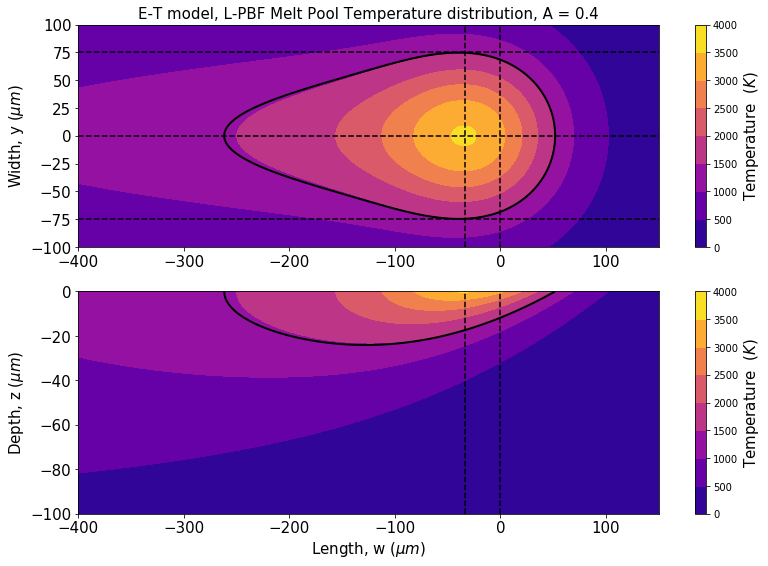

In [4]:
def contour_YX ( xi, psi, zi, u, taulim ):
    conterror = numpy.zeros (shape=(len(psi),len(xi))) ; res = numpy.zeros(shape=(len(psi),len(xi)))
    for i, yvalue in enumerate (psi) :
        for j, xvalue in enumerate (xi) :
            res [ i, j ] , conterror [ i , j ] = quad ( integrand, 0, taulim, args = ( xvalue, yvalue, zi, u ), epsabs=1e-10, epsrel=1e-10)
    Tcont = res / ( numpy.sqrt ( 2 *numpy.pi ) )
    return Tcont, conterror

def contour_XZ(xi,psi,zi,u,taulim):
    conterror = numpy.zeros( shape = ( len(zi), len(xi) ) ) ; res = numpy.zeros(shape = ( len(zi), len(xi) ) )
    for i, zvalue in enumerate ( zi ) :
        for j, xvalue in enumerate (xi):
            res [ i, j ], conterror [ i, j ] = quad ( integrand, 0, taulim, args = (xvalue, psi, zvalue, u ), epsabs=1e-12, epsrel=1e-12 )
    Tcont = res / (numpy.sqrt ( 2 * numpy.pi ) )
    return Tcont, conterror

Tcontour_YX, Error_YX = contour_YX ( xi_YX, psi_YX, zi_YX, u_par, tau )
Tcontour_YX = ( Tcontour_YX * Absor * n_par ) + Tambient  # Multiply by operating parameter and add ambient temperature

Tcontour_XZ, Error_XZ = contour_XZ (xi_XZ, psi_XZ, zi_XZ, u_par, tau)
Tcontour_XZ = ( Tcontour_XZ  * Absor * n_par ) + Tambient

ET_contour_graphs = pyplot.figure ( figsize = ( 13 , 9 ) ) ; font = 15
pyplot.subplot(211) 
pyplot.tick_params (labeltop = False, labelright = False, labelleft = True )
xgrid_YX, ygrid_YX = numpy.meshgrid ( w, y_YX )
xgrid_YX = xgrid_YX * (10**6) ; ygrid_YX = ygrid_YX * (10**6) ; #xgrid_YX = xgrid_YX + 34
contours_YX = pyplot.contourf ( xgrid_YX, ygrid_YX, Tcontour_YX, cmap = cm.plasma )
cbar_YX = pyplot.colorbar ( contours_YX )
contlines_YX = pyplot.contour(xgrid_YX, ygrid_YX, Tcontour_YX ,[ Tmelt ], colors = ( 'black' ), linewidths=(2), linestyles= '-')
#pyplot.clabel(contlines_YX,fmt='%2.1f', colors='black', fontsize=font)

pyplot.title ('E-T model, L-PBF Melt Pool Temperature distribution, A = '+ str(Absor) , fontsize = font)
pyplot.ylabel('Width, y $(μm)$',fontsize=font) ; #pyplot.xlabel('Length $(μm)$',fontsize=font)
cbar_YX.set_label('Temperature  $ (K) $' ,fontsize=font)
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0);
#pyplot.ticklabel_format (axis = 'both', style = 'sci', scilimits = ( 0, 0 ) )
#pyplot.subplots_adjust (hspace = 0.05)
pyplot.axhline(y=0, color='black', linestyle='--')  ; pyplot.axvline(x=0,color='black', linestyle='--');
pyplot.axvline(x=-34,color='black', linestyle='--');
pyplot.axhline(y = 75,color='black', linestyle='--' ) ; pyplot.axhline( y = -75, color ='black', linestyle='--')

pyplot.subplot(212)
pyplot.tick_params(labeltop=False, labelright=False,labelleft=True)
#pyplot.gca().invert_yaxis()
xgrid_XZ, ygrid_XZ = numpy.meshgrid ( w, z_XZ )
xgrid_XZ = xgrid_XZ * (10**6) ; ygrid_XZ = ygrid_XZ * (10**6) ; #xgrid_XZ = xgrid_XZ + 34
contours_XZ = pyplot.contourf ( xgrid_XZ, ygrid_XZ, Tcontour_XZ, cmap = cm.plasma )
cbar_XZ = pyplot.colorbar(contours_XZ)
contlines_XZ = pyplot.contour(xgrid_XZ, ygrid_XZ, Tcontour_XZ, [ Tmelt ],colors=('black'),linewidths=(2),linestyles= '-')
#pyplot.clabel(contlines_XZ,fmt='%2.1f', colors='black', fontsize=font)
pyplot.axvline(x=0,color='black', linestyle='--'); pyplot.axvline(x=-34,color='black', linestyle='--');
cbar_XZ.set_label('Temperature  $ ( K )  $' ,fontsize=font)
pyplot.ylabel('Depth, z $ (μm)$',fontsize=font) ; pyplot.xlabel('Length, w $(μm)$',fontsize=font)
pyplot.yticks(fontsize=font, rotation=0) ; pyplot.xticks(fontsize=font, rotation=0);
#pyplot.ticklabel_format (axis = 'both', style = 'sci', scilimits = ( 0, 0 ) )

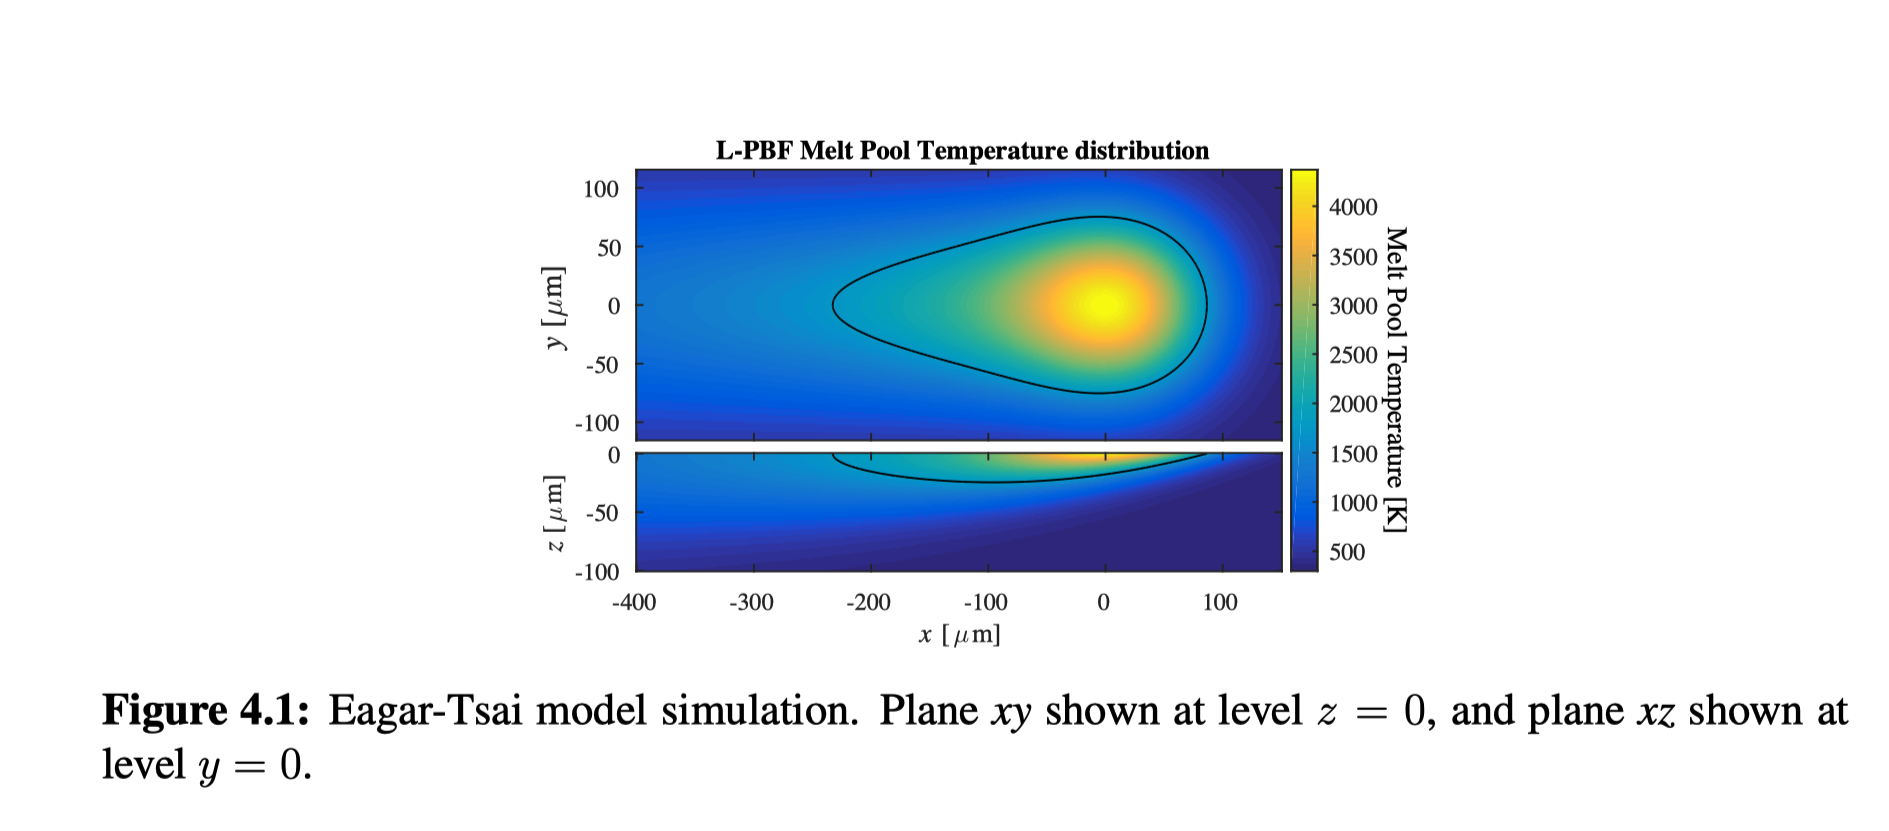

In [5]:
from IPython.display import Image
Image(filename='Tapia_results.png', width = 1800 , height = 1000)

In [6]:
numpy.max(Tcontour_YX), numpy.max(Error_YX), numpy.max(Tcontour_XZ), numpy.max(Error_XZ)

(3546.4027745029994,
 9.999871763977097e-11,
 3546.5543793837846,
 9.999651550367519e-13)

# Replicating Eagar-Tsai publication results 

Here, an attempt is made to replicate the results reported by Eagar and Tsai in their 1983 paper "Temperature Fields Produced by Travelling Distributed Heat Sources". 

The dimensionless solution form is utilized for calculations of the **peak** dimensionless temperature distributions along the dimensionless width and depth dimensions. All the dimensionless temperatures are divided by the operating parameter, $n$, in order to include all curves on a single graph.

In their paper, Eagar and Tsai note that depending on the parameters n and u , the center-line temperature may often **exceed the boiling temperature of metals**.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in power
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


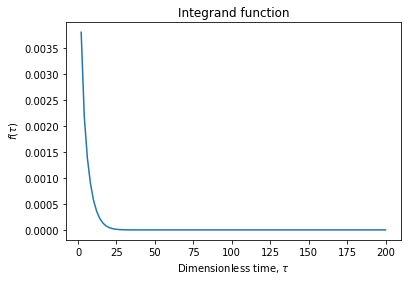

In [7]:
# How the integrand function behaves along the variable of integration
tau_t = numpy.linspace(0,200,100)
xi_t = 4
psi_t = 10
zi_t = 0
u_t = 8
pyplot.plot (tau_t,integrand(tau_t,xi_t,psi_t,zi_t,u_t))
pyplot.title ('Integrand function') ;  pyplot.xlabel ('Dimensionless time, $ τ $') ; pyplot.ylabel(' $ f(τ)$ ');

### Define model  parameters, run and output simulation results

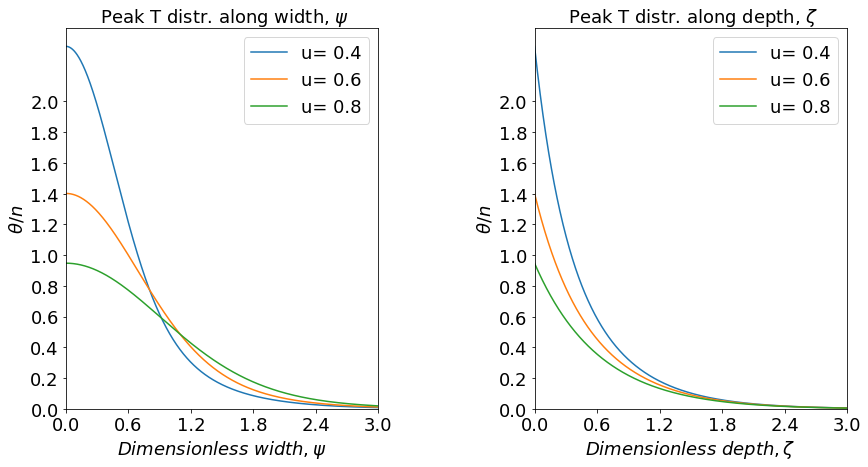

In [8]:
#Carbon steel 
#k=33 #W/mK thermal conductivity     Heat capacity: ρ*C = 5.4e06 J/mK, α = 0.05e-04 m^2/s
#To=300 #K initial temperature (ambient)
#a=4*(10**-6)#m^2/s #After calculations from paper
#v_ET=0.25/1000 #m/s Order of scan speeds used in E-T model; 

points = 1000
uvalues = numpy.array ( [ 0.4, 0.6, 0.8] )

xi_width = 0
psi_width = numpy.linspace ( 0, 3, points)
zi_width = 0
tau_width = 2

xi_depth = 0
psi_depth = 0
zi_depth = numpy.linspace ( 0, 3, points )
tau_depth = 2

pyplot.figure(figsize=(14,7)); font=18 

Distr_depth=numpy.zeros((len(uvalues),len(zi_depth)))  ; Error_depth=numpy.zeros((len(uvalues),len(zi_depth)))
Distr_width=numpy.zeros((len(uvalues),len(psi_width))) ; Error_width=numpy.zeros((len(uvalues),len(psi_width)))

#Plot dimensionless temperature distribution along dimensionless width as a function of distribution parameter
pyplot.subplot(121)
for i, uvalue in enumerate ( uvalues ) :
    Distr_width[i,:],Error_width[i,:] = thetan_width (xi_width, psi_width, zi_width, uvalue,tau_width)
    pyplot.plot( psi_width, Distr_width[i,:], label= 'u= '+ str ( uvalue ) )

pyplot.legend(loc='best', fontsize=font) ; pyplot.title(' Peak T distr. along width, $ψ$', fontsize=font) ; 
pyplot.ylabel('$ θ /n $', fontsize=font) ; pyplot.xlabel('$ Dimensionless \ width, ψ $',fontsize=font)
pyplot.yticks( numpy.arange ( 0, 2.2, 0.2), fontsize=font) ; pyplot.xticks( numpy.arange ( 0, 3.6, 0.6), fontsize=font)
pyplot.xlim(0,3); pyplot.ylim(0);

# Plot dimensionless temperature distribution along dimensionless depth as a function of distribution parameter
pyplot.subplot ( 122 )
for i, uvalue in enumerate ( uvalues ) :
    Distr_depth[i,:], Error_depth[i,:] = thetan_depth ( xi_depth, psi_depth, zi_depth, uvalue, tau_depth )
    pyplot.plot (zi_depth,Distr_depth[i,:], label = 'u= '+ str ( uvalue ) )
    
pyplot.legend( loc='best', fontsize = font) ; pyplot.title(' Peak T distr. along depth, $ ζ $', fontsize = font )
pyplot.ylabel( '$ θ /n $', fontsize = font) ; pyplot.xlabel('$ Dimensionless \ depth, ζ $',fontsize = font )
pyplot.yticks( numpy.arange ( 0, 2.2, 0.2), fontsize=font) ; pyplot.xticks( numpy.arange ( 0, 3.6, 0.6), fontsize=font)
pyplot.xlim(0,3); pyplot.ylim (0);
pyplot.subplots_adjust( wspace = 0.5 )

In [9]:
print ('Maximum absolute error of quadrature for both cases (width, depth):') 
numpy.max(Error_width), numpy.max(Error_depth)

Maximum absolute error of quadrature for both cases (width, depth):


(5.00359753630164e-10, 4.076781673653552e-10)

### Comments: 
- For best replication of results of θ/n versus dimensionless depth ( $\zeta$ ) use **fixed_quad** for quadrature of order **n = 8**  and upper limit of integration **$\tau$ = 5 or 6**. Also set $\xi, \psi = 0 \ (centerline).$

- This will yield results closer to the results of the E-T paper for the depth graph but not for width. 
- For the case of width, the curves behave similarly, however, the magnitudes of the surface temperature are calculated to be smaller than the E-T paper's reported results. 
- In their paper, Eagar and Tsai do not report details on the calculation of these results, such as the type and/or order of numerical quadrature they utilized, limits of integration, etc.  
- Thus, exact replication of the results was not possible for both cases.

### Calculating and plotting weld depth vs operating parameter as a function of u

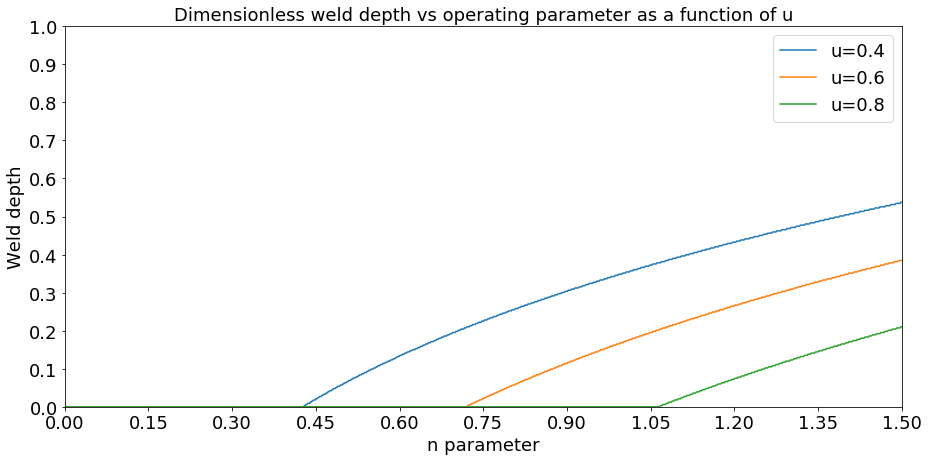

In [10]:
#pyplot.rcParams['ytick.right'] = pyplot.rcParams['ytick.labelright'] = True
#pyplot.rcParams['ytick.left'] = pyplot.rcParams['ytick.labelleft'] = False
pyplot.figure(figsize=(15,7))

nvalues=numpy.linspace(0,1.5,1000)  
WD=numpy.empty((len(uvalues),len(nvalues)))
WD[:]=numpy.nan

for i in [0,1,2]:
    lab=str(uvalues[i]); lab='u='+lab
   
    j=0
    for nvalue in nvalues:
        array=Distr_depth[i,:]
        arrayn=array*nvalue
        k=0
        for theta in arrayn:
            residual=theta-1
            if residual<0.01:
                WD[i,j]=zi_depth[k]
                break
            else:
                k=k+1
        j=j+1
    
    pyplot.plot(nvalues,WD[i,:],label=lab)
    #pyplot.scatter(nvalues,WD[i,:])

font=18
pyplot.legend(loc='best', fontsize=font)
pyplot.xlabel('n parameter',fontsize=font)
pyplot.ylabel('Weld depth',fontsize=font)
pyplot.title('Dimensionless weld depth vs operating parameter as a function of u',fontsize=font)
pyplot.yticks(numpy.linspace(0,1,11),fontsize=font, rotation=0)
pyplot.xticks(numpy.linspace(0,1.5,11),fontsize=font, rotation=0);
pyplot.xlim(0,1.5); pyplot.ylim(0);

### Calculating and plotting weld width vs operating parameter as a function of u

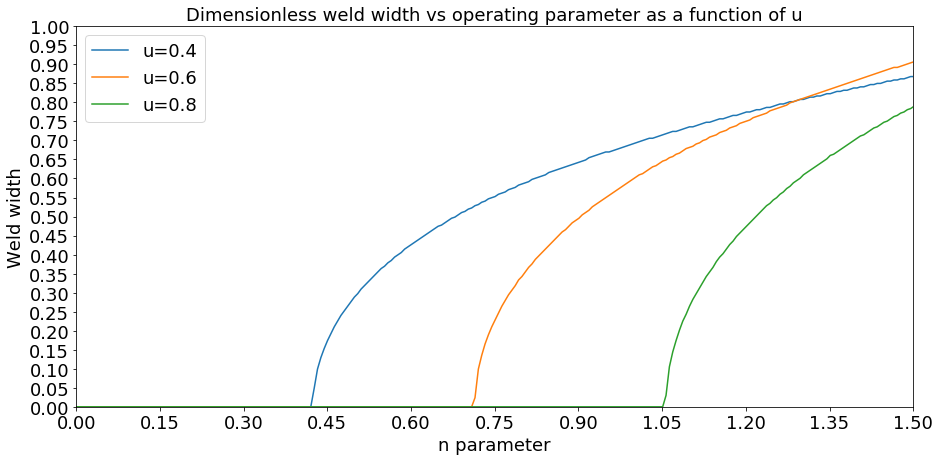

In [11]:
pyplot.rcParams['ytick.left']  = True
ax=pyplot.figure(figsize=(15,7))
nvalues=numpy.linspace(0,6,1000)  
WW=numpy.empty((len(uvalues),len(nvalues)))
WW[:]=numpy.nan

for i in [0,1,2]:
    lab=str(uvalues[i]); lab='u='+lab
    j=0
    for nvalue in nvalues:
        array=Distr_width[i,:]
        arrayn=array*nvalue
        k=0
        for theta in arrayn:
            residual=theta-1
            if residual<0.001:
                WW[i,j]=psi_width[k]
                break
            else:
                k=k+1
        j=j+1
    pyplot.plot(nvalues,WW[i,:],label=lab)
    #pyplot.scatter(nvalues,WW[i,:])

font=18
pyplot.legend(loc='best', fontsize=font)
pyplot.xlabel('n parameter',fontsize=font)
pyplot.ylabel('Weld width',fontsize=font)
pyplot.title('Dimensionless weld width vs operating parameter as a function of u',fontsize=font);
pyplot.yticks(numpy.linspace(0,1,21),fontsize=font, rotation=0)
pyplot.xticks(numpy.linspace(0,1.5,11),fontsize=font, rotation=0);
pyplot.xlim(0,1.5);pyplot.ylim(0,1);